In [2]:
from utils.binaries import *
from utils.plotting import *

15:04:53 (   +9.7s) [INFO   ] -- import logging
15:04:53 (    +2ms) [INFO   ] -- import numpy as np
15:04:53 (    +5ms) [INFO   ] -- import uncertainties
15:04:53 (    +2ms) [INFO   ] -- import numpy as np
15:04:53 (    +5ms) [INFO   ] -- import uncertainties
15:04:54 (  +133ms) [INFO   ] -- import pandas as pd
15:04:54 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
15:04:54 (    +1ms) [INFO   ] -- import binaries.tools as tools
15:04:54 (  +275ms) [INFO   ] -- import matplotlib.pyplot as plt
15:04:54 (  +268ms) [INFO   ] -- import seaborn as so
15:04:54 (    +1ms) [INFO   ] -- import plotting.tools as plot
15:04:54 (    +5ms) [DEBUG  ] -- font size set to 9.5
15:04:54 (    +1ms) [DEBUG  ] -- label size set to 13.0
15:04:54 (    +0ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
15:04:54 (    +0ms) [DEBUG  ] -- markersize set to 2.0
15:04:54 (    +1ms) [DEBUG  ] -- usetex set to False


In [18]:
import os

heat1 = pd.DataFrame(
    [],
    columns=(
        "runid",
        "tel",
        "step",
        "date",
        "src",
        "mA",
        "forDB",
        "jobfile",
        "comment",
    ),
)
heat2 = pd.DataFrame(
    [],
    columns=(
        "runid",
        "tel",
        "step",
        "date",
        "src",
        "mA",
        "forDB",
        "jobfile",
        "comment",
    ),
)

for list in np.sort(os.listdir("/home/filip/xy-calibration/config/calib_runlists")):
    df = pd.read_csv(
        f"/home/filip/xy-calibration/config/calib_runlists/{list}",
        delimiter=";",
        comment="#",
        names=(
            "runid",
            "tel",
            "step",
            "date",
            "src",
            "mA",
            "forDB",
            "jobfile",
            "comment",
        ),
    )

    heat1 = pd.concat([heat1, df[(df["tel"].str.strip() == "he1") & (df["step"] != 0)]])
    heat2 = pd.concat([heat2, df[(df["tel"].str.strip() == "he2") & (df["step"] != 0)]])

/tmp/ipykernel_14551/2175211377.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heat1 = pd.concat([heat1, df[(df['tel'].str.strip() == 'he1') & (df['step'] != 0)]])
/tmp/ipykernel_14551/2175211377.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heat2 = pd.concat([heat2, df[(df['tel'].str.strip() == 'he2') & (df['step'] != 0)]])


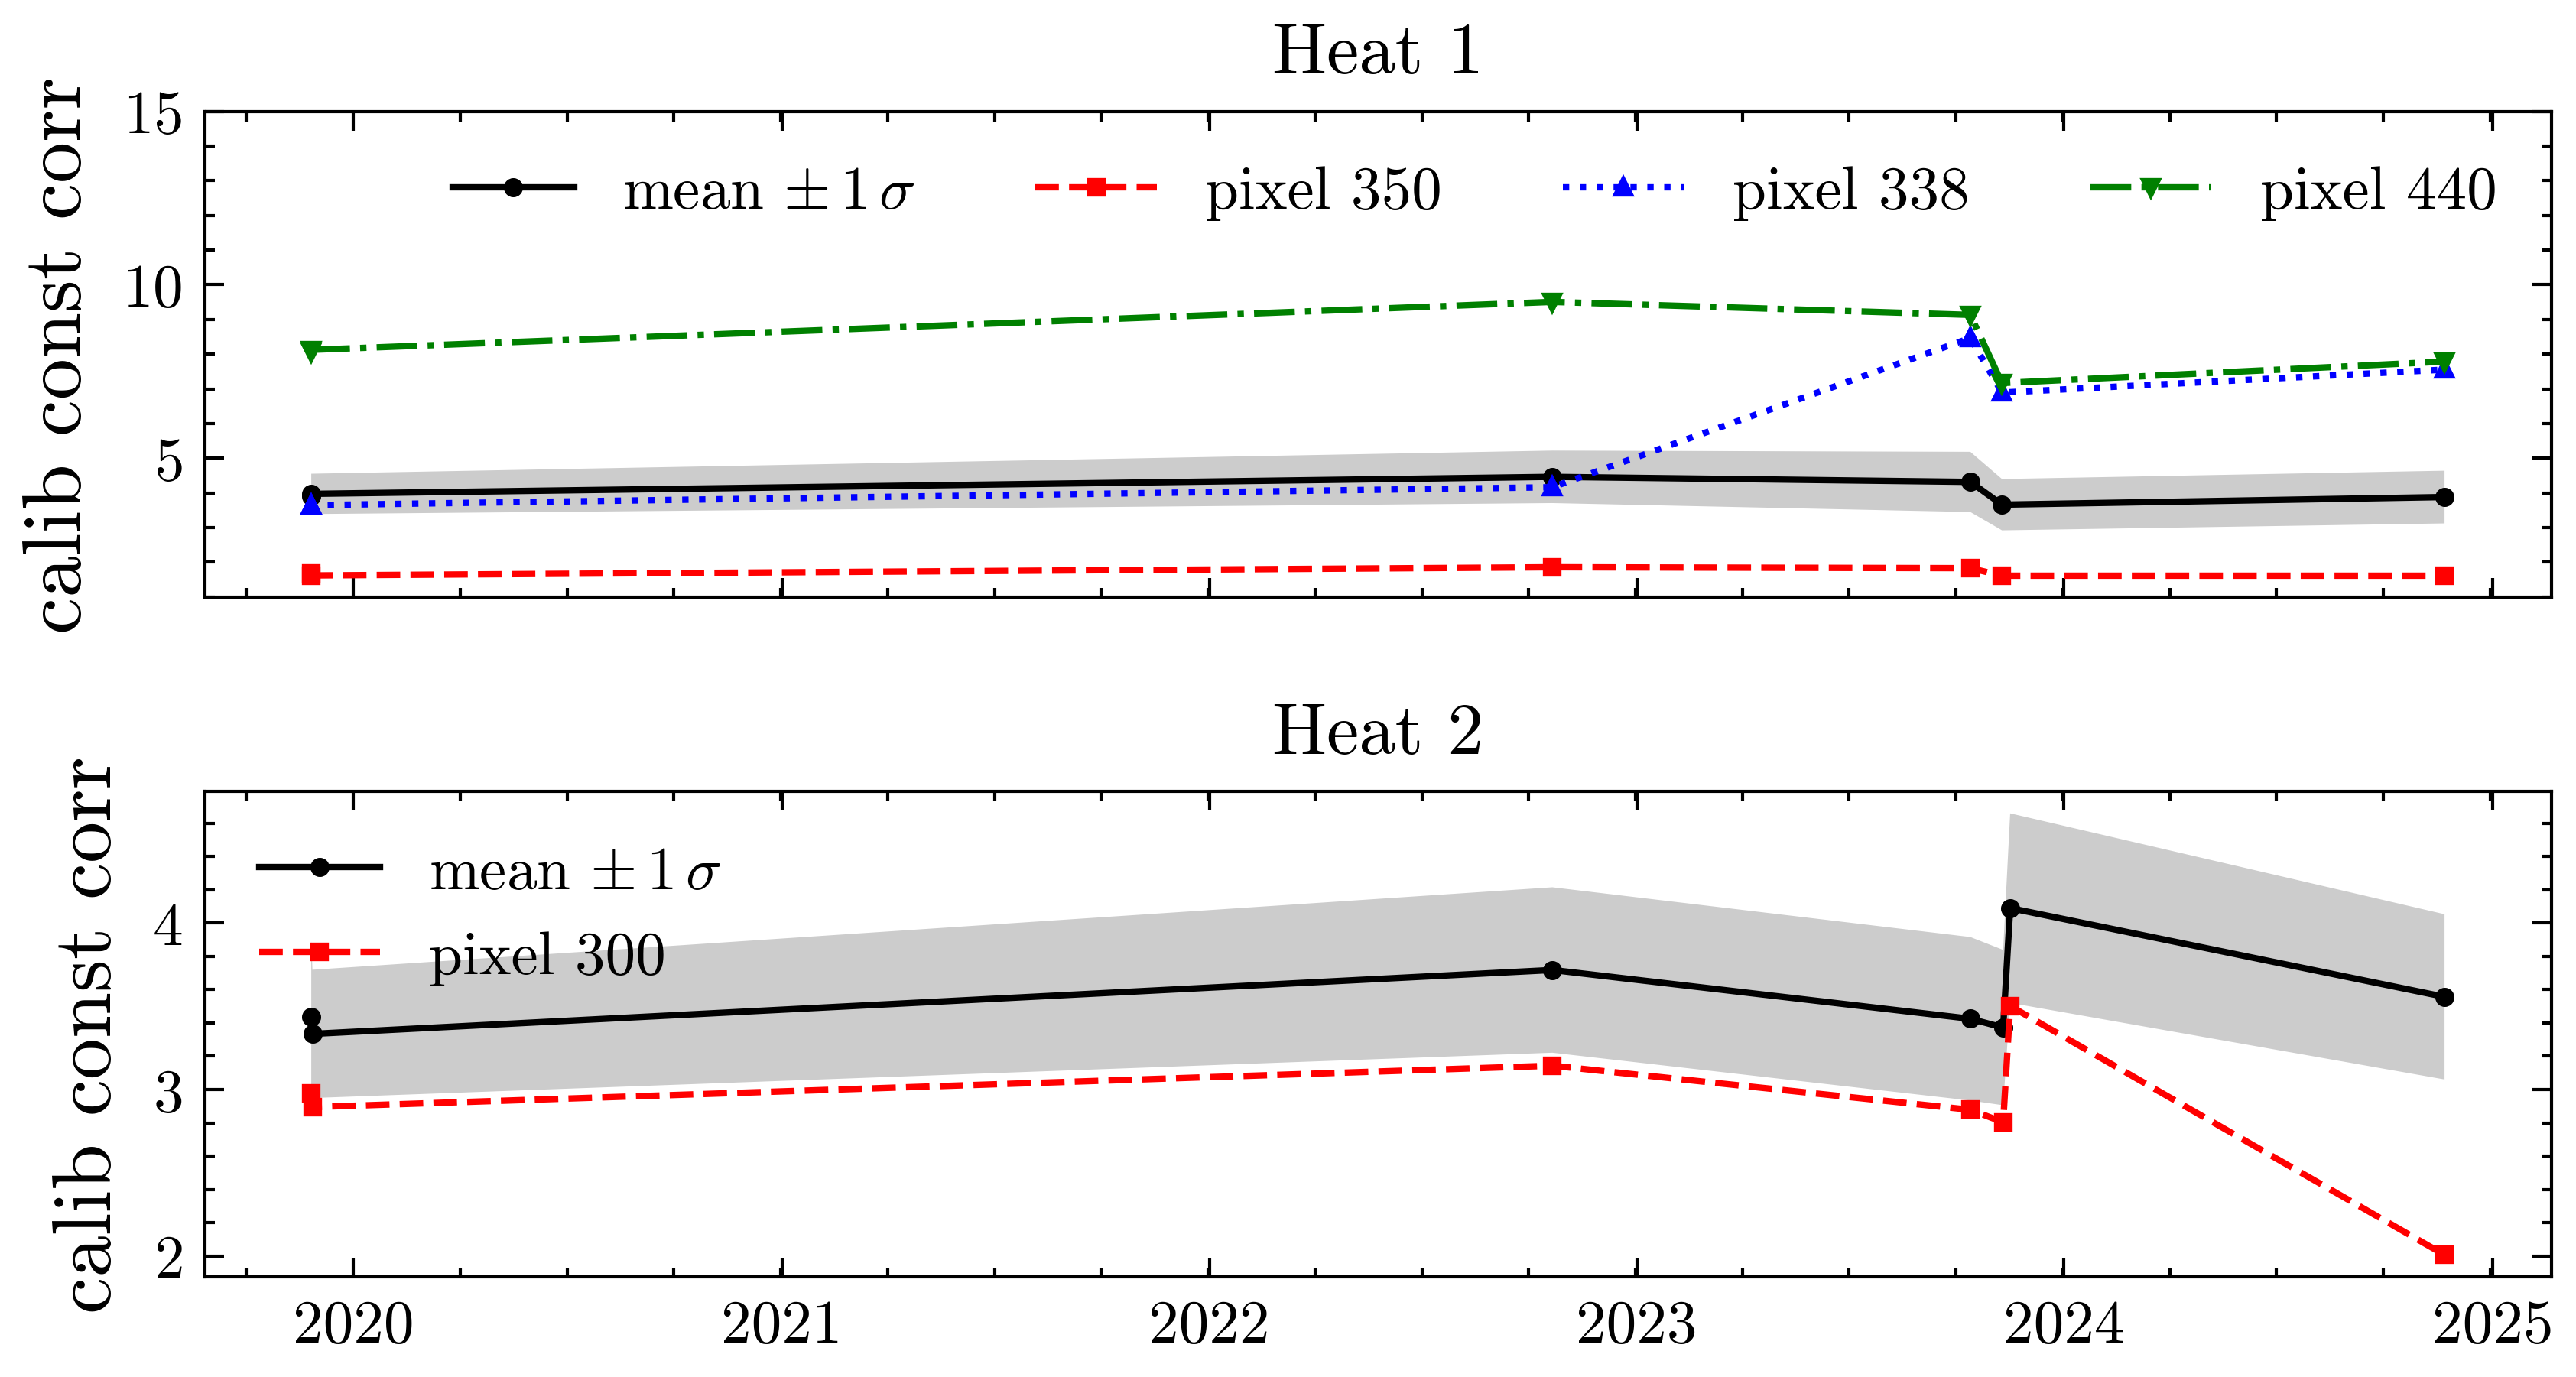

In [80]:
from datetime import datetime

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

x1, he1_350, he1_438, he1_440 = [], [], [], []
mean1, mean2 = [], []
x2, he2_300 = [], []
std1, std2 = [], []

base = "/home/filip/xy-calibration/results/"
for _, run in heat1.iterrows():
    pix, calib_const_corr = np.loadtxt(
        f"{base}/outCorr_{run['runid']}.txt", usecols=[0, -1], unpack=True
    )

    x1.append(datetime.strptime(run["date"].strip(), "%Y-%m-%d"))
    he1_350.append(calib_const_corr[350 - 1])
    he1_438.append(calib_const_corr[438 - 1])
    he1_440.append(calib_const_corr[440 - 1])
    mean1.append(np.mean(calib_const_corr[calib_const_corr < 20]))
    std1.append(np.std(calib_const_corr[calib_const_corr < 20]))

for _, run in heat2.iterrows():
    pix, calib_const_corr = np.loadtxt(
        f"{base}/outCorr_{run['runid']}.txt", usecols=[0, -1], unpack=True
    )
    x2.append(datetime.strptime(run["date"].strip(), "%Y-%m-%d"))
    he2_300.append(calib_const_corr[300 - 1])
    mean2.append(np.mean(calib_const_corr))
    std2.append(np.std(calib_const_corr))

ax1.set_title("Heat 1")

mean1, std1 = np.array(mean1), np.array(std1)
mean2, std2 = np.array(mean2), np.array(std2)

ax1.errorbar(x1, mean1, label="mean $\pm\,1\,\sigma$")
ax1.fill_between(x1, mean1 + std1, mean1 - std1, alpha=0.2)
ax1.errorbar(x1, he1_350, label="pixel 350")
ax1.errorbar(x1, he1_438, label="pixel 338")
ax1.errorbar(x1, he1_440, label="pixel 440")
ax1.legend(ncol=4)
ax1.set_ylabel("calib const corr")
ax1.set_ylim(1, 15)

ax2.set_title("Heat 2")

ax2.errorbar(x2, mean2, label="mean $\pm\,1\,\sigma$")
ax2.fill_between(x2, mean2 + std2, mean2 - std2, alpha=0.2)
ax2.errorbar(x2, he2_300, label="pixel 300")
ax2.legend()
ax2.set_ylabel("calib const corr")

plt.subplots_adjust(hspace=0.4)

In [21]:
print(he2_300)

[3.4533568542225406, 3.4533568542225406, 3.4533568542225406, 3.4533568542225406, 3.4533568542225406, 3.4533568542225406, 3.4533568542225406]


In [22]:
heat2

,runid,tel,step,date,src,mA,forDB,jobfile,comment
28,04523x,he2,6,2019-11-26,KIT,2.7,1,job_HEAT_bay2_hex_s60_r0-1300_cut.txt,"""reversed positions"""
33,04547x,he2,6,2019-11-27,OLO,15.9,1,job_HEAT_bay2-CZ_hex_s60_r0-1300_cut.txt,"""reversed positions"""
69,05621x,he2,6,2022-10-21,"""OLO""",15.9,1,"""job_HEAT_bay2-CZ_hex_s60_r0-1300_cut.txt""",""""""
7,6025,he2,6,2023-10-13,"""OLO""",15.9,1,"""job_HEAT_bay2-CZ_hex_s60_r0-1300_cut.txt""",""""""
37,6075,he2,6,2023-11-10,"""OLO""",15.9,1,"""job_HEAT_bay2_hex_s60_r0_1300_cut""",""""""
77,6101,he2,6,2023-11-16,"""OLO""",15.9,1,"""job_HEAT_bay2_hex_s60_r0-1300_cut.txt""","""incomplete run, 1319 events"""
43,6516,he2,6,2024-11-21,"""OLO""",15.9,1,"""job_HEAT_bay2_hex_s60_r0-1300_cut.txt""",""""""


In [45]:
data = np.loadtxt("/home/filip/xy-calibration/results/outCorr_05616x.txt")

326

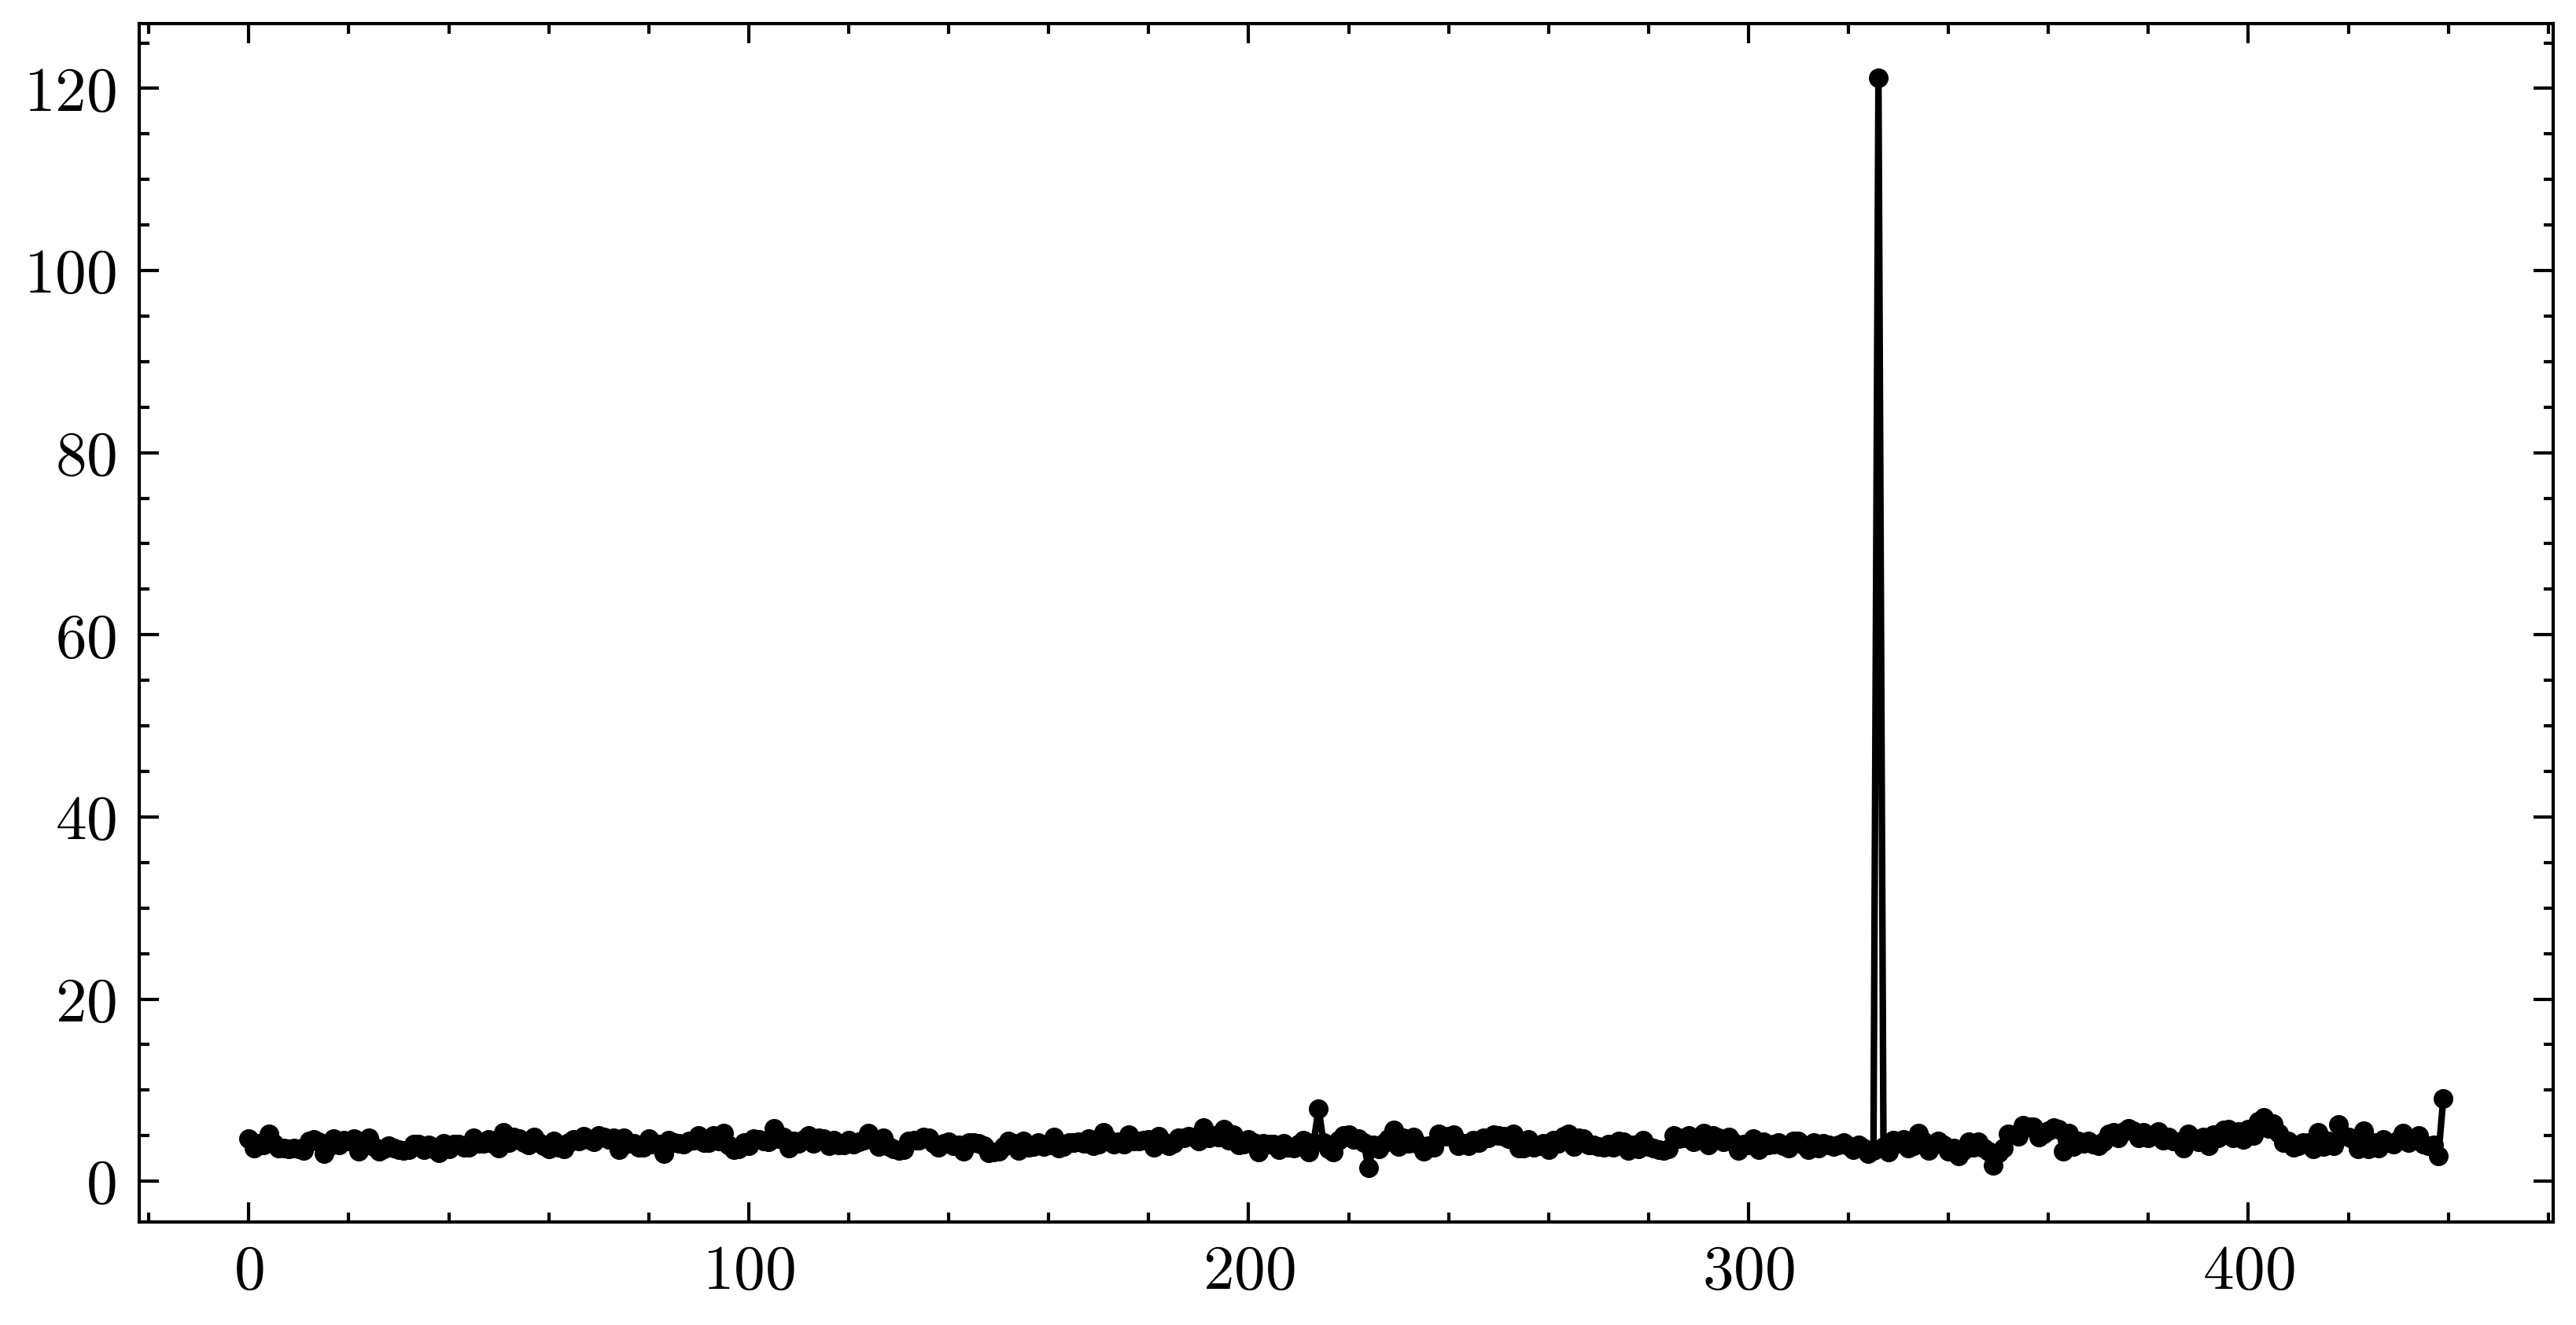

In [54]:
plt.plot(range(440), data[::, 1])
np.argmax(data[:, 1])

In [70]:
data = np.loadtxt(
    "/home/filip/xy-calibration/results/outPositionsComb_16464.txt",
    skiprows=1,
    delimiter=",",
)

In [72]:
print(data[:, -1])

[4380111.828 4400043.727 4394908.027 ... 4434788.533 4433627.773
 4432725.265]


[ 1.43200000e+03  2.44966685e+03 -2.70000000e+02  8.83000000e+02
  1.43200000e+03  1.43200000e+03  2.97500000e+01  3.02500000e+01
  1.62500000e+01  2.54582500e+04 -9.20992242e+07]


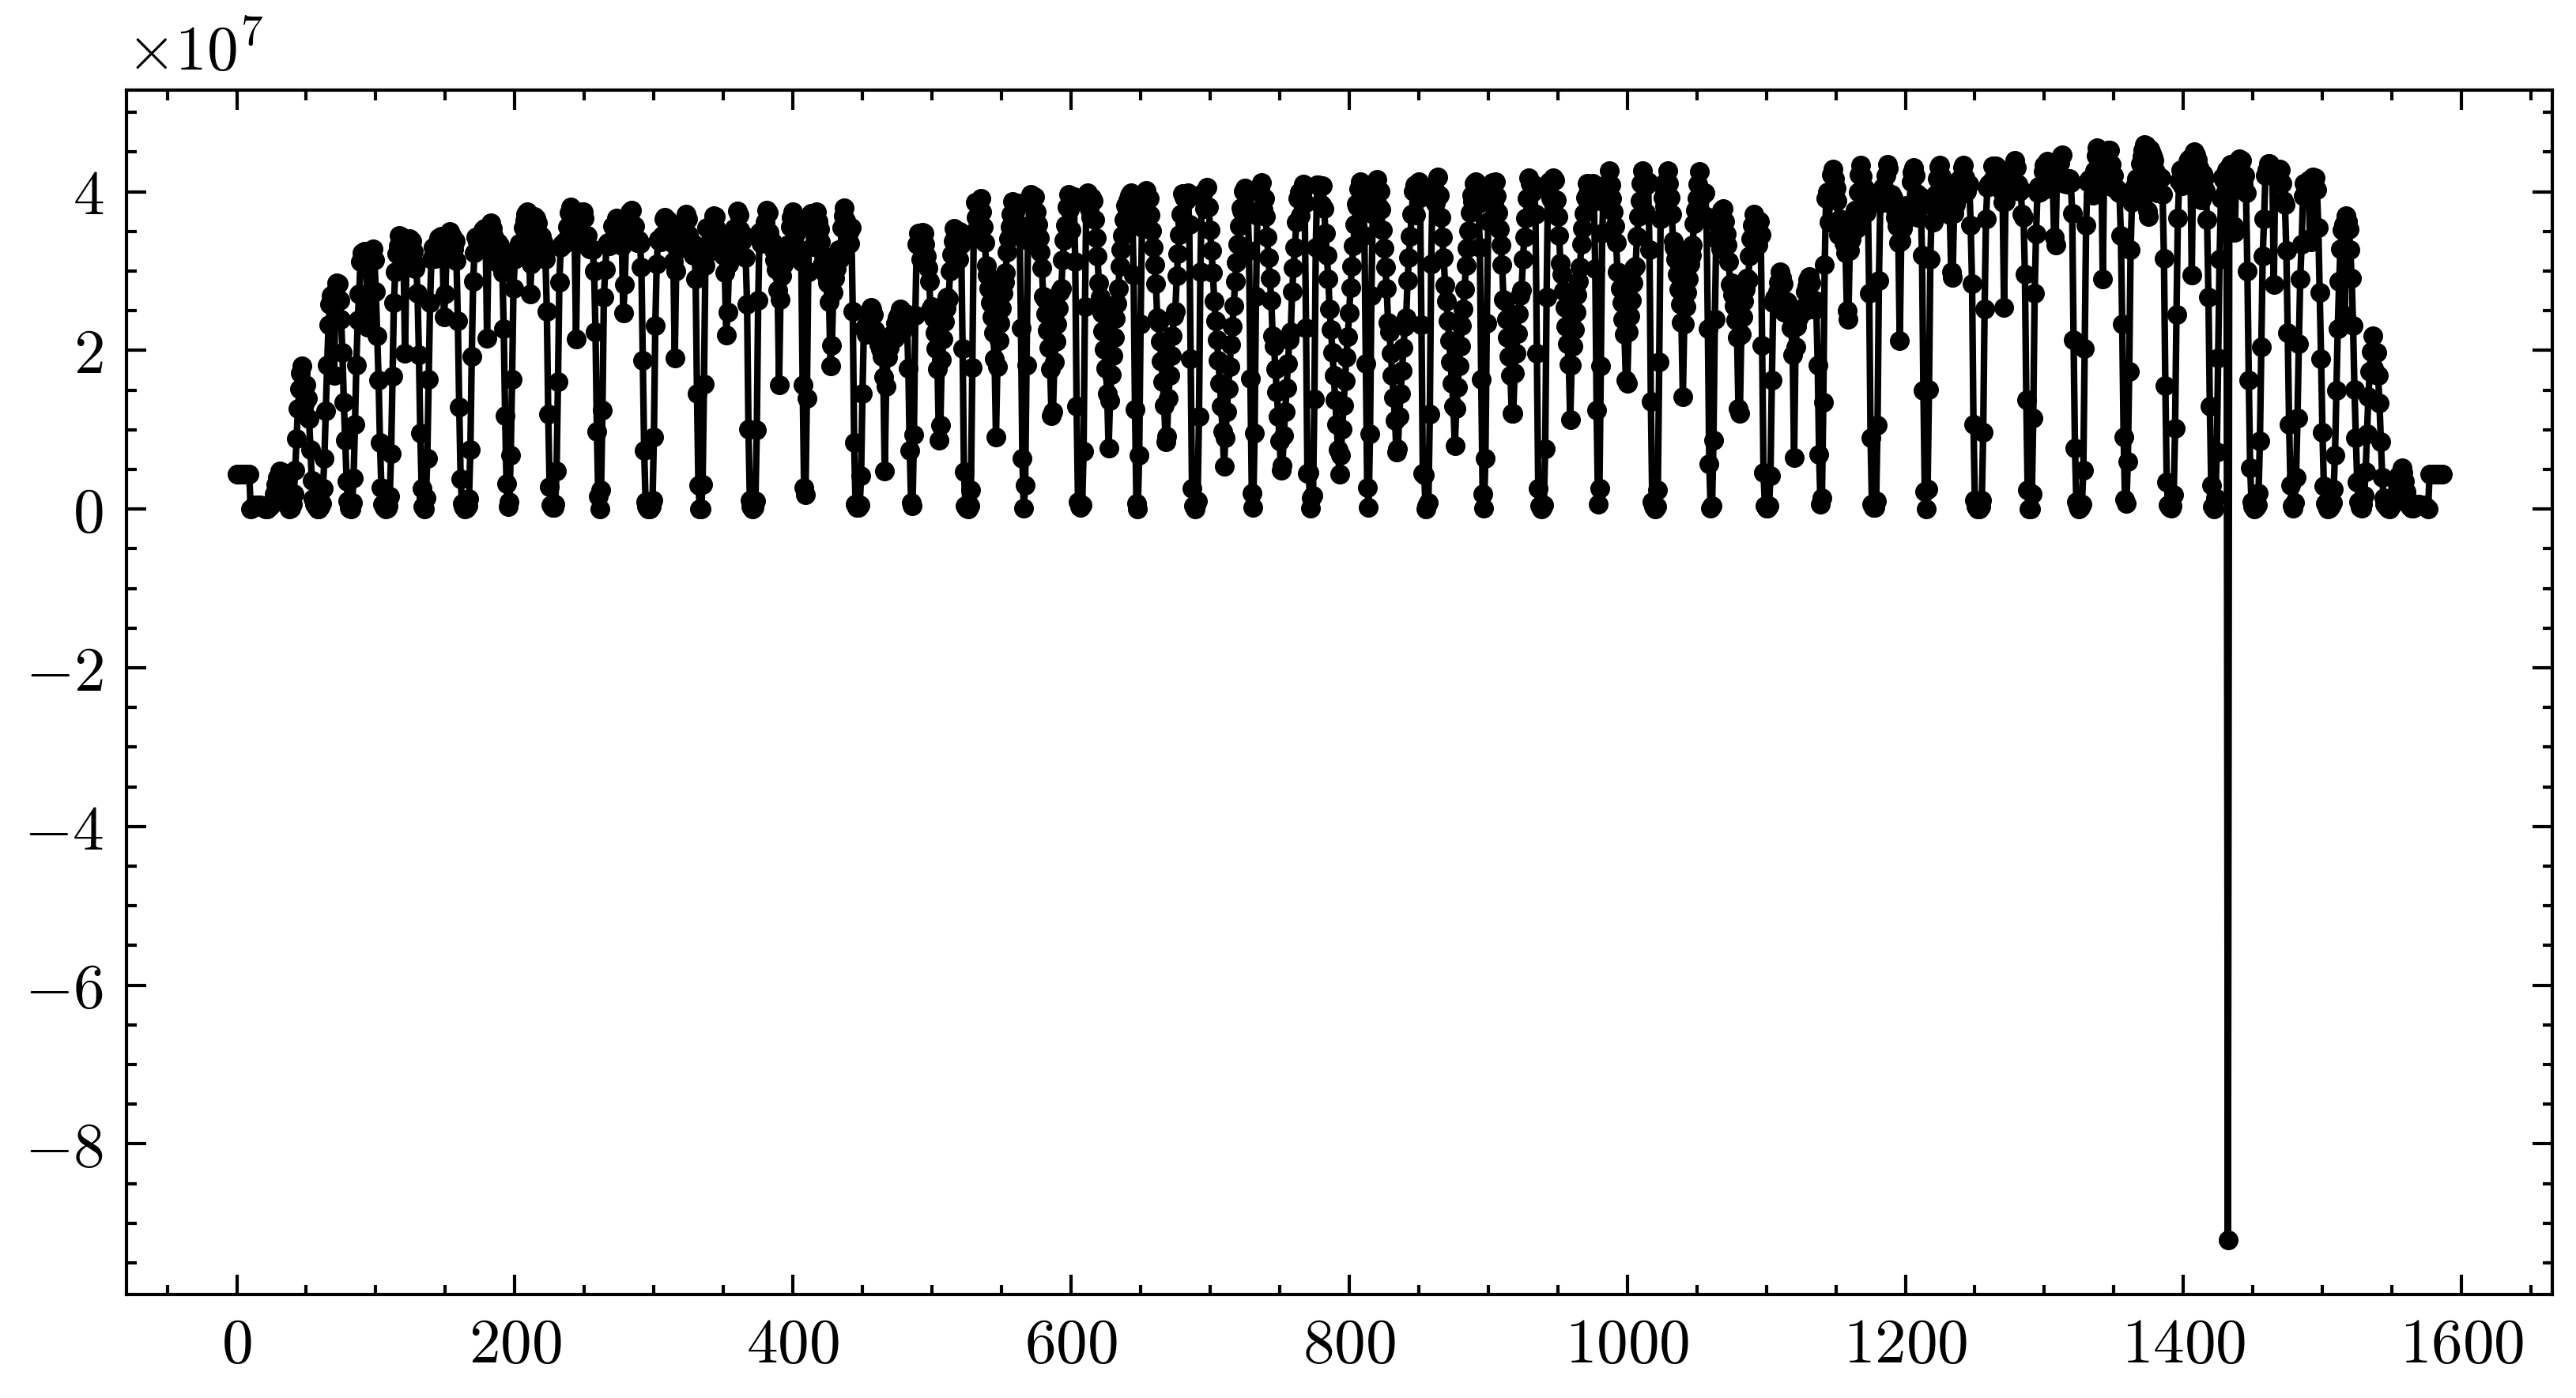

In [ ]:
plt.plot(range(len(data)), data[:, -1])
print(data[np.argmin(data[:, -1])])